In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


- 참고사이트


scipy    stats

https://docs.scipy.org/doc/scipy/reference/stats.html

stable   statistics

https://numpy.org/doc/stable/reference/routines.statistics.html

math

https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions



# 위치 통계량
- 중심경향성

## 평균
- 가장많이 사용되는 대표값
    - 모든 데이터의 합을 데이터의 개수로 나눈값 (산술평균)
- 특징
    - 계산이 쉽고 수학적으로 활용하기 편리하며 각자료에 유일값을 가짐
    - 분산의 계산, 모수추정, 가설 검정등 통계에서 유리한 자료
  

### 산술평균

In [6]:
x = [1,2,3,4,5]
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.0

3.0

3.000

- 교제 31쪽 예제

In [8]:
df = pd.read_csv('./csv_File/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [9]:
df.shape

(50, 2)

In [10]:
# sum(), len() 함수를 이용해서 산술평균 계산
# 영어과목의 평균 계산 
sum(df['english'])/len(df['english'])

58.380

In [11]:
# numpy 의 mean()으로 계산
np.mean(df['english'])

58.380

In [12]:
# pandas 의 mean()
df['english'].mean()

58.380

In [13]:
# scipy 의 mean()
sp.mean(df['english'])

<ipython-input-13-224114dae0e2>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

## 기하 평균
- n개의 양수 값을 모두 곱한 것의 제곱근
- 성장률의 평균



In [14]:
data = [2,8,3]

In [15]:
# 산술평균
np.mean(data)

4.333333333333333

In [17]:
# 기하 평균 
math.prod(data)**(1/len(data))

3.634

In [18]:
# scipy.stats.gmean()
gmean(data)

3.634241185664279

## 조화평균

In [21]:
# 조화평균 계산
data = np.array([80,120])
1/data   # 역수들 
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [20]:
# scipy.stat.hmean
hmean(data)

95.99999999999999

## 가중평균
- numpy.average(a[,axis,weights,returned]) 이용

In [23]:
np.average(np.arange(1,5))
np.average(np.arange(1,11),weights = np.arange(10,0,-1))

2.5

4.0

In [24]:
np.mean(np.arange(1,11))

5.5

## 중앙값(median)
- 중위수 , 중간값
- 데이터를 크기 순서대로 나열할 때 가운데 위치하는 숫자
- 데이터의 개수가 홀수일 경우 : 가운데 위치하는 유일한 숫자
- 데이터의 개수가 짝수일 경우 : 가운데 위치하는 2개의 숫자의 평균값

- 특징
    - 극단적인 값에 영향을 받지 않는 장점
    - 가운데 위치하는 한개 또는 두개의 데이터만으로 계산
- 극단적인 값이 포함된 데이터의 대표 값 비교
    - 평균 : 모든 데이터를 전부 고려하여 계산한 값 , 무게중심
    - 중앙값 :  순서에 따라 가운데에 위치 데이터가 크든 작든 영향을 덜받음 

In [25]:
# 예제 데이터 
scores = np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [26]:
# 순서 통계량 
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [27]:
# median 계산식 
n = len(sorted_scores)
if n%2 == 0:
    x1 = sorted_scores[n//2 - 1]
    x2 = sorted_scores[n//2]
    median = (x1+x2)/2
else:
    median = sorted_scores[(n+1)//2-1]
median

57.5

In [28]:
sorted_scores[24],sorted_scores[25]

(57, 58)

In [29]:
# numpy median()함수 
np.median(scores)

57.5

In [30]:
# pandas.DataFrame 의 median()함수 
df['english'].median()

57.500

## 절사 평균
- 평균의 장점과 중앙값의 장점을 갖는 대표값

- 절사비율(%)
    - 전체 데이터의 개수에 대해 몇% 의 데이터 (상위+하위) 를 배제할 것인가 결정
    

In [32]:
np.random.seed(3)
income = np.random.normal(2000000,500000,100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [33]:
# 평균 소득
np.mean(income)

1945681.4627969689

In [35]:
# 소득 10억인 사람 추가
income = np.append(income,10 ** 9)


In [36]:
np.mean(income)

11711453.296859775

In [37]:
np.median(income)

1910517.9894137066

- 절사 평균 계산

In [39]:
# scipy.stats.
trim_mean(income,0.2)

1934158.764258797

## 최빈값(mode)
- 자료 중 가장 자주 나타나는(빈도가 가장 많은) 관측치
    - 평균,중위수와 달리 자료에 따라 존재하지 않을수도 유일값이 아닐수도 있음
    - 질적 변수에도 활용
- 중앙값과 최빈값 특징
    - 자료 속에 극단적인 이상치가 있는 경우 극단적 관찰치에 덜 민감한 중앙ㄱ밧 사용
    - 자료의 분포가 비대칭인 경우 평균의 보조 자료로 활용
    - 개방 구간을 갖는 도수분포표의 경우 중앙값 또는 최빈값을 대표값으로 사용
    - 명목자료와 서열자료의 경우 최빈값 사용

In [42]:
np.random.seed(3)
data = np.random.choice(['A','B','C'],1000)
# A , B, C 라는 요소로 이루어진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

In [43]:
mode(data)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

In [44]:
# 최빈값 
mode(data).mode

array(['A'], dtype='<U1')

In [45]:
#  최빈값의 빈도
mode(data).count

array([350])

- pandas.Series 의 values_counts 를 이용하여 첫번째 결과가 최빈값

In [47]:
pd.Series(data).value_counts()

A    350
B    328
C    322
dtype: int64

In [49]:
pd.Series(data).value_counts().index[0]   # 최빈값
pd.Series(data).value_counts()[0]   # 빈도수

'A'

350

In [50]:
np.random.seed(123)
data = np.random.normal(100,20,size = 1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [51]:
sorted(data)[0],sorted(data)[-1]
# 최소          #최대

(35.37889984161376, 171.43158436052622)

In [52]:
# numpy 의 min() max()
np.min(data)
np.max(data)

35.37889984161376

171.43158436052622

## 사분위수(quartile)
- 자료를 크기 순으로 늘어놓은 수 4등분하여 각각의 경계에 있는 수 
## 백분위수(percentile)
- 크기순으로 나열한 수들을 백등분하여  각각의 경계에 있는 수 

In [55]:
# 1사분위수( 하사분위수)
np.percentile(data,25) # 데이터의 25퍼 --> 사분위수 

86.30886819268538

In [56]:
# 3사분위수 (상사분위수)
np.percentile(data,75)

113.37731495435875

In [57]:
# 2사분위수(중위수)
np.percentile(data,50)

99.17628889574436

### 5가 통계량 
- 최소값 ,1,중위,3사분위수,최대값
- 상자- 수염그림(boxplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x148bc0645b0>,
 'caps': [<matplotlib.lines.Line2D at 0x148bc064c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x148bc064250>],
 'medians': [<matplotlib.lines.Line2D at 0x148bc076370>],
 'fliers': [<matplotlib.lines.Line2D at 0x148bc0766d0>],
 'means': []}

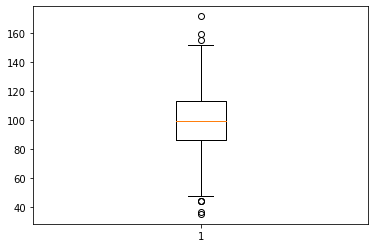

In [58]:
import matplotlib.pyplot as plt

plt.boxplot(data)

## 기술통계량 계산 함수 describe(

In [59]:
describe(data)
describe(df['english'])  # 표본데이터의 기술통계량

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [61]:
df['english'].describe()  # 4분위값도 같이나옴

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [113]:
describe(df['english'],ddof=0) # 

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [62]:
import numpy as np
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})


# 변이통계량
## 범위 

In [64]:
np.random.seed(123)
data =np.random.normal(100,20,size=1000)
data[:10]


array([78.287, 119.947, 105.660, 69.874, 88.428, 133.029, 51.466, 91.422,
       125.319, 82.665])

In [65]:
np.min(data), np.max(data)

(35.37889984161376, 171.43158436052622)

In [69]:
# 범위 = 최대값 - 최소값
np.max(data) - np.min(data) 

136.05268451891246

In [67]:
# numpy 의 ptp()
np.ptp(data)

136.05268451891246

## 중간범위
- 최대값과 최소값의 평균

In [74]:
(np.max(data) + np.min(data) )/2

103.40524210106999

## 사분위간 범위

In [70]:
np.quantile(data,0.75)  - np.quantile(data,0.25)

27.06844676167337

In [71]:
iqr(data)

27.06844676167337

## 사분위수 편차
- 범위의 문제점을 보완한 척도
- 사분위간 범위의 값을 2로 나눈 값으로 사분위 범위의 평균값

In [72]:
(np.quantile(data,0.75)  - np.quantile(data,0.25))/2

13.534223380836686

In [73]:
iqr(data)/2

13.534223380836686

## 편차(deviation)
- 자료값과 평균과의 차이
- xi-mean()

In [76]:
data-np.mean(data)

array([-20.921, 20.738, 6.451, -29.335, -10.781, 33.820, -47.742, -7.787,
       26.110, -16.544, -12.786, -1.103, 30.619, -11.987, -8.088, -7.896,
       44.910, 44.527, 20.872, 8.515, 15.539, 30.606, -17.925, 24.308,
       -24.286, -11.964, 18.933, -27.782, -2.010, -16.444, -4.321,
       -55.180, -34.639, -13.206, 19.341, -2.681, 0.848, 14.556, -16.799,
       6.464, -15.316, -33.762, -7.027, 12.267, 7.563, 0.555, 48.639,
       9.050, 20.366, 45.554, -25.090, -19.984, 35.666, -15.170, 1.385,
       22.178, 18.605, 35.889, 30.704, 22.179, -14.663, 16.689, 7.077,
       -25.734, 29.137, 16.936, 1.701, -3.871, -23.175, 4.782, 10.160,
       -15.832, 24.035, -21.153, -41.671, 21.586, -7.276, -1.729, -15.959,
       -31.328, 25.896, -12.986, 34.010, 16.937, -5.504, -20.927, -13.858,
       -23.459, 42.534, 4.080, 23.795, -24.556, 4.412, 24.349, -5.909,
       21.414, -20.900, -26.478, 8.379, -6.792, 13.632, -38.766, 15.037,
       52.757, 0.299, 1.474, 4.382, -36.448, 9.314, -31.317, -

In [77]:
# 편차의 합은 항상 0
(data-np.mean(data)).sum()

-7.815970093361102e-12

## 분산(variaince)
- 산포도의 척도로 가장 널리 사용되는 방법
- 평균을 중심으로 데이터가 퍼져있는 정도의 측도
- 각 데이터와 평균과의 차이를 제곱하여 합한 값의 평균
- 각데이터와 평균과의 차이를 제곱하여 합한 값의 평균
    - 모분산: n으로 나누어줌
    - 표본분산 : n-1로 나누어줌
    

### : var(a,ddof=0)
- ddof 인수
    - 기본값은 0-> 모집단 분산
    - 표본 분산의 경우 1로 설정

In [79]:
x = [1,2,3,4,5]
# 표본분산
np.var(x,ddof=1) 
# 모분산
np.var(x) 
# 모분산 
np.array(x).var() 
pd.Series(x).var(ddof=0)

2.5

2.0

2.0

2.000

## 표준편차 
- 모든 데이터가 동일한 값을 갖는다면 분산과 표준편차는 0으로 계산
- 모든 데이터에 동일한 값

### 표준편차 계산: std(a,ddof=0)
- 데이터의 단위와 동일하게 만듬

In [80]:
x = [1,2,3,4,5]
# 표본편차 (S)
np.std(x,ddof=1) 
# 모표준편차 (sigma)
np.std(x) 
np.array(x).std() 
pd.Series(x).std(ddof=0)

1.5811388300841898

1.4142135623730951

1.4142135623730951

1.414

## 변동계수(CV)
- 표본 표준편차를 표본평균으로 나눈 값 또는 그 값에 100을 곱한 값
- 상대표준편차
- 서로 다른 평균고 ㅏ표준편차를 갖는 여러 데이터의 흩어진 정도를 비교할 때 사용
- 변동계수 값이 크다는 것은 데이터의 흩어지 ㄴ정도가 상대적으로 크다는 의미
- 표본 변동계수 cv=s/x,모변동 계수 cv=알파/뮤

- 변동계수 계산
- np.std(x,axis=axis,ddof=ddof/np.mean(x)

In [86]:
men = [72,74,77,68,66,75]
women = [45,48,52,53,46,50]

print('평균')
np.mean(men)
np.mean(women)
print('표본 표준편차')
np.std(men,ddof=1)
np.std(women,ddof=1)


평균


72.0

49.0

표본 표준편차


4.242640687119285

3.22490309931942

In [87]:
# np.std(x,axis-axis,ddof=ddof/np.mean(x) 이용
print('남자cv: ',np.std(men,ddof=1)/np.mean(men))
print('남자cv: ',np.std(women,ddof=1)/np.mean(women))

남자cv:  0.05892556509887895
남자cv:  0.06581434896570246


In [88]:
print('남자cv: ',variation(men))
print('남자cv: ',variation(women))

남자cv:  0.053791435363991905
남자cv:  0.06008000589338671


## 데이터의 정규화
- scaling(표준화)
    - 각 값들을 상대적인 값으로 편화시키는 기법
1. standard scaling(Z)
    - 평균:0 표준편차:1이됨
2. min-max scaling
    - 0~1 사이의 값으로 변환

In [91]:
# 표준화 예제 
df = pd.read_csv('./csv_File/ch2_scores_em.csv',index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [97]:
df[['english']].describe()

,english
count,50.00
mean,58.38
std,9.80
min,37.00
25%,54.00
50%,57.50
75%,65.00
max,79.00


In [98]:
df['mathematics'].describe()

count    50.000
mean     78.880
std       8.414
min      57.000
25%      76.000
50%      80.000
75%      84.000
max      94.000
Name: mathematics, dtype: float64

### z-scaling

In [104]:
# 평균이 0 표준편차가 1이됨
z1 = (df['english'] - df['english'].mean())/df['english'].std()
z2 = (df['mathematics'] - df['mathematics'].mean())/df['mathematics'].std()
print(z1.min() , z1.max())
print(z2.min() , z2.max())
# -3~3 사이에 값으로 분포 

-2.1816743772942324 2.104121873704727
-2.600313324789425 1.796925844187209


In [103]:
z1.mean(), z1.std()

(-0.000, 1.000)

### min-max scaling

In [106]:
s1 = (df['english'] - df['english'].min())/(df['english'].max() - df['english'].min())
s2 = (df['mathematics'] - df['mathematics'].min())/(df['mathematics'].max() - df['mathematics'].min())
print('eng:',s1.min(), s1.max())
print('math:',s2.min(), s2.max())

eng: 0.0 1.0
math: 0.0 1.0


### sklearn.preprocessing.m=MinMaxScaler 를 이용한 스케일링
- 머신러닝을 위해 쓰는 경우가 대부분
- df의 각열에 대해서 스케일링 하는데 적합함

In [111]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
S = scaler.fit_transform(df)
pd.DataFrame(S,columns = df.columns, index = df.index).head()

,english,mathematics
student number,,
1,0.119,0.216
2,0.762,0.622
3,0.452,0.162
4,0.095,0.162
5,0.476,0.514


# 모양 통계량
- 분포의 모양
- 왜도, 첨도

## 왜도(skewness)
- 데이터의 비대칭도 
- 분포 모양이 대표값(예,평균) 을 중심으로 좌우에 모양이 대칭적인가 아닌가를 측정
- 데이터가 한쪽 방향으로얼마나 치우쳐져 있는 가를 나타냄 
- 특징
    - 왜도가 0에 가까운 값을 가지면 분포의 모양은 좌우 대칭
    - 왜도가 음수로 나타나면 오른쪽으로 치우친 분포(왼쪽 꼬리분포) 모양

## 왜도계산
- 분포의 비대칭도
- 왜도가 0이면 정규분포
- 왜도의 절대값이 1.5이상이면 많이 치우쳤다고 봄
- scipy.stats.skew(a[,axis,bias,nan_policy])

In [114]:
%matplotlib inline
# 오른쪽으로 꼬리가 긴 분포(right skwed, positive)
x1 = [1]*30+[2]*20 + [3]*20+ [4]*15 + [5]*15

#  좌우대칭 분포
x2 = [1]*15+[2]*20 + [3]*30+ [4]*20 + [5]*15

# 왼쪽으로  꼬리가 긴 분포(left skwed, negative)
x3 = [1]*15+[2]*15 + [3]*20+ [4]*20 + [5]*30

In [115]:
x1[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [119]:
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

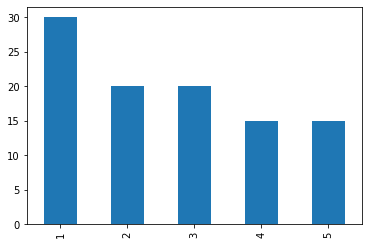

In [120]:
pd.Series(x1).value_counts(sort = False).plot(kind='bar')

<AxesSubplot:>

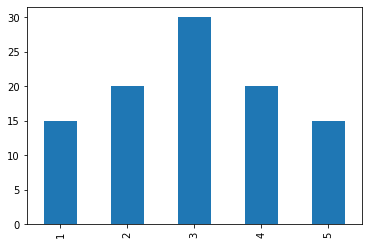

In [121]:
pd.Series(x2).value_counts(sort = False).plot(kind='bar')

<AxesSubplot:>

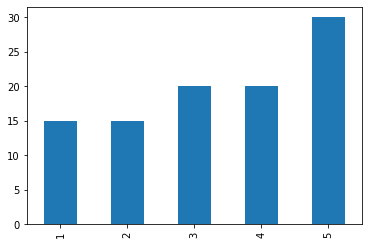

In [122]:
pd.Series(x3).value_counts(sort = False).plot(kind='bar')

In [123]:
print('오른쪽으로 꼬리가 긴분포의 왜도',skew(x1))
print('좌우대칭 분포 왜도',skew(x2))
print('왼쪽으로 꼬리가 긴분포의 왜도',skew(x3))

오른쪽으로 꼬리가 긴분포의 왜도 0.3192801008486361
좌우대칭 분포 왜도 0.0
왼쪽으로 꼬리가 긴분포의 왜도 -0.31928010084863606


## 첨도(kurtosis)
- 데이터의 뽀족한 정도
- 분포가 대표값을 중심으로 얼마나 모여있는가를 나타내는 척도
- 정규분포 (첨도=3) 를 기준으로 비교
    - 데이터가 대푯값을 중심으로 상당히 많이 몰려있다면 분포 가운데 모양이 뾰족한모양(첨도>3) 으로 나타남
    - 첨도<3 이라면 많이 완만함

### 첨도 계산
- 0에 가까울수록 정규분포
- 균일 분포에 가까울수록 음수 

In [124]:
# 균일분포 : 데이터의 빈도가 비슷함 ( uniform dist)
x1 = [1]*20+[2]*20 + [3]*20+ [4]*20 + [5]*20

#  좌우대칭 분포 ( 정규분포에 가까움)  조금 뾰족 
x2 = [1]*10+[2]*20 + [3]*40+ [4]*20 + [5]*10

# 뾰족한 분포 
x3 = [1]*5+[2]*15 + [3]*60+ [4]*20 + [5]*5

<AxesSubplot:>

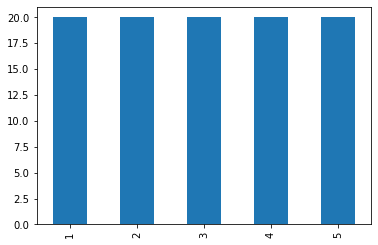

In [125]:
pd.Series(x1).value_counts(sort = False).plot(kind='bar')

<AxesSubplot:>

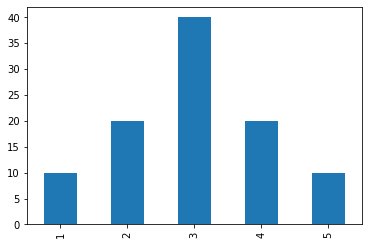

In [126]:
pd.Series(x2).value_counts(sort = False).plot(kind='bar')

<AxesSubplot:>

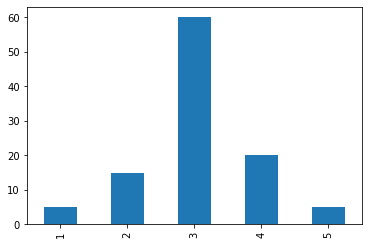

In [127]:
pd.Series(x3).value_counts(sort = False).plot(kind='bar')

In [128]:
print('전혀 뾰족하지 않을때 (평평할때 ) 첨도 ',kurtosis(x1))
print('조금 뾰족할때 첨도 ',kurtosis(x2))
print('매우 뾰족할때 첨도 ',kurtosis(x3))

전혀 뾰족하지 않을때 (평평할때 ) 첨도  -1.3
조금 뾰족할때 첨도  -0.5
매우 뾰족할때 첨도  0.6644691468213724
